# Borders, Obstacles & Buffering

This notebook shows how *OptiWindNet* models spatial constraints for wind-farm layout and cabling. We will initialize networks with different combination of exterior borders and interior obstacles. We will also explore buffering (i.e. expanding borders and shrinking obstacles) to see how it can remove concavities, split or eliminate obstacles, and trigger informative warnings when shapes intersect or turbines fall outside permitted areas.

Import required packages

In [1]:
from optiwindnet.api import WindFarmNetwork
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

## Borders and obstacles

### 1. Initialize and optimize wfn with the defined coordinates.

In [3]:
wfn1 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn1.optimize()

Plot Navigation meth, available links, selected links, and final solution.
As plotted, borders and obstacles are depicted properly.

<Axes: >

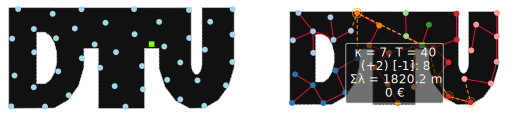

In [4]:
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn1.plot_location(ax=ax1)
wfn1.plot(ax=ax2)

### 2. Initialize wfn without obstacles (Only borders):

<Axes: >

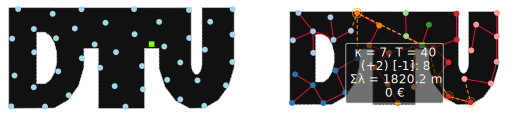

In [5]:
wfn2 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn2.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn2.plot_location(ax=ax1)
wfn2.plot(ax=ax2)

### 3. Initialize wfn without exterior borders (Only obstacles)

<Axes: >

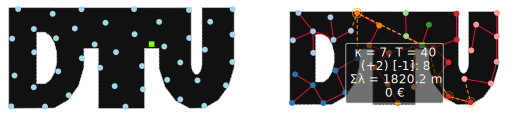

In [6]:
wfn3 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn3.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn3.plot_location(ax=ax1)
wfn3.plot(ax=ax2)

### 4. Initialize wfn without borders and obstacles (No borders, no obstacles)

<Axes: >

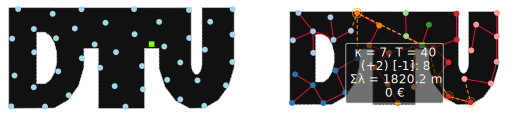

In [7]:
wfn4 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn4.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn4.plot_location(ax=ax1)
wfn4.plot(ax=ax2)

### 5. New obstacles (intersecting with the exterior borders)

<Axes: >

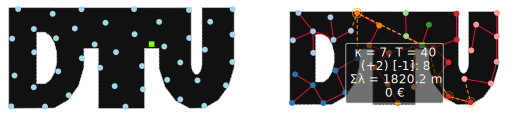

In [8]:
# border + obstacles
wfn5 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn5.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn5.plot_location(ax=ax1)
wfn5.plot(ax=ax2)

We can use `.merge_obstacles_into_border()` to refine the borders and simplify the layout.

<Axes: >

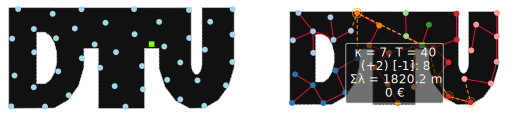

In [9]:
wfn5.merge_obstacles_into_border()
res_optimize = wfn5.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn5.plot_location(ax=ax1)
wfn5.plot(ax=ax2)

### 7. Obstacle outside the borders
In this case a `Warning` is printed out, providing information about the correspondant obstacle.

<Axes: >

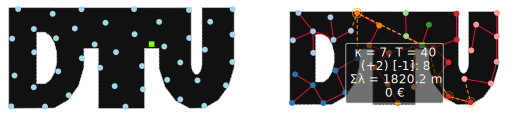

In [10]:
wfn7 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn7.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn7.plot_location(ax=ax1)
wfn7.plot(ax=ax2)

We can use `.merge_obstacles_into_border()` to remove unrelavant obstacles.

<Axes: >

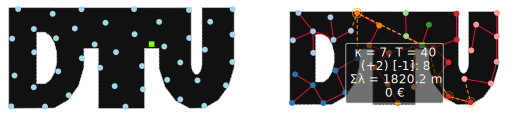

In [11]:
wfn7 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
wfn7.merge_obstacles_into_border()
res_optimize = wfn7.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn7.plot_location(ax=ax1)
wfn7.plot(ax=ax2)

## Buffering
A buffer can be specified when initializing the WindFarmNetwork. The exterior border will be expanded, while interior obstacles will be shrunk accordingly.

### 8. Initialize `WindFarmNetwork`object with a `buffer_dist`.

<Axes: >

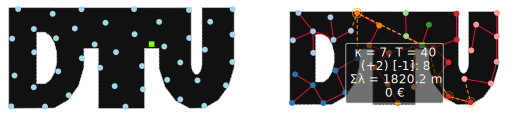

In [12]:
wfn8 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
res_optimize = wfn8.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn7.plot_location(ax=ax1)
wfn7.plot(ax=ax2)

<Axes: >

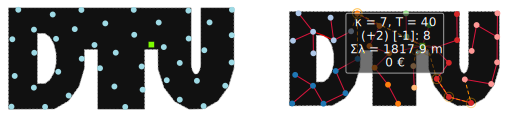

In [13]:
wfn8.buffer_border_obstacles(buffer_dist=1)
res_optimize = wfn8.optimize()
fig, axs = plt.subplots(1, 2, facecolor='none', figsize=(9, 4))
ax1, ax2= axs.flatten()
wfn8.plot_location(ax=ax1)
wfn8.plot(ax=ax2)

Original vs buffered border/obstacles can be visualized using plot_original_vs_buffered()

<Axes: title={'center': 'Original and Buffered Shapes'}>

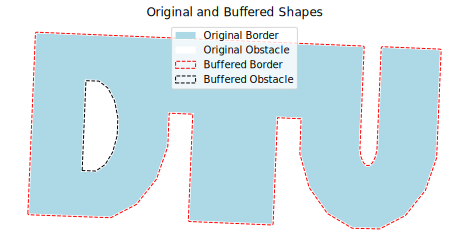

In [14]:
wfn8.plot_original_vs_buffered()

### 9. Removal of a concavity
In this case a `Warning` is printed out, providing information about the unexpected changes in the border.

The defined border is non-convex and buffering may introduce unexpected changes. For visual comparison use plot_original_vs_buffered().


<Axes: >

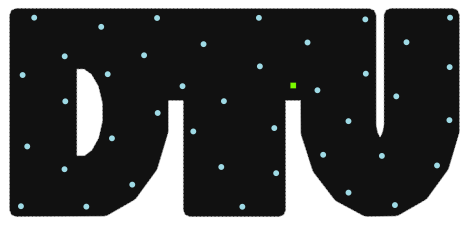

In [15]:
wfn9 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
wfn9.buffer_border_obstacles(buffer_dist=5)
wfn9.plot_location()

Plotting original vs buffered borders confirms that one of the concavities is removed after buffering (upper left side of the border.)

<Axes: title={'center': 'Original and Buffered Shapes'}>

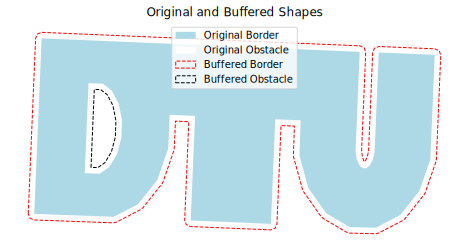

In [16]:
wfn9.plot_original_vs_buffered()

### 10. Removal of an obstacle

In [17]:
wfn10 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
wfn10.buffer_border_obstacles(buffer_dist=20)

The defined border is non-convex and buffering may introduce unexpected changes. For visual comparison use plot_original_vs_buffered().
Buffering by 20.00 completely removed the obstacle at index 0. For visual comparison use plot_original_vs_buffered().


Plotting original vs buffered borders confirms that abostacle at index 0 is removed after buffering.

<Axes: title={'center': 'Original and Buffered Shapes'}>

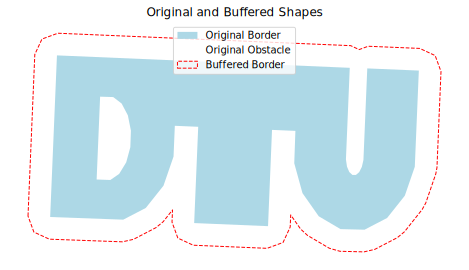

In [18]:
wfn10.plot_original_vs_buffered()

### Turbines outside the border or inside the obstacles

`OptiWindNet` checks if the turbinesC are defined properly with respect to the given border and obstacles.

In [19]:
wfn11 = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)
wfn11.is_layout_within_bounds()

True